In [87]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



In [30]:
#defining the paths
FEATURES_PATH = '/media/bhushan/Deven/VMR Project/QVHighlight/features/'
ANNOTATIONS_PATH = '/media/bhushan/Deven/VMR Project/QVHighlight/annotations/'
TRAIN_DATASET_PATH = os.path.join(ANNOTATIONS_PATH, 'highlight_train_release.jsonl')
VAL_DATASET_PATH = os.path.join(ANNOTATIONS_PATH, 'highlight_val_release.jsonl')
TEST_DATASET_PATH = os.path.join(ANNOTATIONS_PATH, 'highlight_test_release.jsonl')
CLIP_FEATURES_PATH = os.path.join(FEATURES_PATH, 'clip_features')
CLIP_TEXT_FEATURES_PATH = os.path.join(FEATURES_PATH, 'clip_text_features')
PANN_FEATURES = os.path.join(FEATURES_PATH, 'pann_features')
SLOWFAST_FEATURES = os.path.join(FEATURES_PATH, 'slowfast_features')

In [27]:
#Reading the train dataset
with open(TRAIN_DATASET_PATH, 'r') as f:
    train_json = [json.loads(l) for l in f]

In [28]:
print('Number of examples in the train dataset:', len(train_json))
print('Fields in the train dataset:', train_json[0].keys())
print('1.  `qid` - is a unique identifier of a `query`')
print('2.  `vid` - is the video id and is formatted as `{youtube_id}_{start_time}_{end_time}`.')
print('3.  `duration` - is an integer indicating the duration of this video.')
print('4.  `relevant_windows` - is the list of windows that localize the moments, each window has two numbers, one indicates the start time of the moment, another one indicates the end time.')
print('5.  `relevant_clip_ids` - is the list of ids to the segmented 2-second clips that fall into the moments specified by `relevant_windows`, starting from 0.')
print('6.  `saliency_scores` - contains the saliency scores annotations, each sublist corresponds to a clip in `relevant_clip_ids`. There are 3 elements in each sublist, they are the scores from three different annotators. A score of `4` means `Very Good`, while `0` means `Very Bad`.')

Number of examples in the train dataset: 7218
Fields in the train dataset: dict_keys(['qid', 'query', 'duration', 'vid', 'relevant_clip_ids', 'saliency_scores', 'relevant_windows'])
1.  `qid` - is a unique identifier of a `query`
2.  `vid` - is the video id and is formatted as `{youtube_id}_{start_time}_{end_time}`.
3.  `duration` - is an integer indicating the duration of this video.
4.  `relevant_windows` - is the list of windows that localize the moments, each window has two numbers, one indicates the start time of the moment, another one indicates the end time.
5.  `relevant_clip_ids` - is the list of ids to the segmented 2-second clips that fall into the moments specified by `relevant_windows`, starting from 0.
6.  `saliency_scores` - contains the saliency scores annotations, each sublist corresponds to a clip in `relevant_clip_ids`. There are 3 elements in each sublist, they are the scores from three different annotators. A score of `4` means `Very Good`, while `0` means `Very Ba

In [29]:
print('Example of a train dataset entry:\n', train_json[0]) 

Example of a train dataset entry:
 {'qid': 9769, 'query': 'some military patriots takes us through their safety procedures and measures.', 'duration': 150, 'vid': 'j7rJstUseKg_360.0_510.0', 'relevant_clip_ids': [36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 68, 69, 70, 72], 'saliency_scores': [[4, 3, 2], [4, 1, 3], [4, 3, 4], [4, 1, 2], [4, 2, 2], [4, 2, 2], [4, 2, 2], [4, 2, 2], [4, 1, 2], [4, 1, 3], [4, 3, 4], [4, 3, 3], [4, 3, 3], [4, 3, 4], [4, 3, 2], [4, 1, 2], [4, 3, 2], [4, 1, 2], [4, 1, 2], [4, 1, 2], [4, 1, 2], [3, 3, 3], [4, 3, 4], [4, 1, 3], [4, 1, 2], [4, 1, 2], [4, 1, 2], [4, 1, 2], [4, 1, 2]], 'relevant_windows': [[72, 82], [84, 94], [96, 106], [108, 118], [120, 130], [136, 142], [144, 146]]}


In [73]:
print(os.listdir(SLOWFAST_FEATURES))

['HKotWqbcUds_360.0_510.0.npz', '--a6qL3eL0c_210.0_360.0.npz', '--a6qL3eL0c_360.0_510.0.npz', '--a6qL3eL0c_510.0_660.0.npz', '--a6qL3eL0c_60.0_210.0.npz', '--a6qL3eL0c_660.0_810.0.npz', '--d84Ars5ng_210.0_360.0.npz', '--d84Ars5ng_360.0_510.0.npz', '--d84Ars5ng_60.0_210.0.npz', '--ePzhMQU1w_210.0_360.0.npz', '--ePzhMQU1w_360.0_510.0.npz', '--ePzhMQU1w_60.0_210.0.npz', '--euWZ-mcOg_210.0_360.0.npz', '--euWZ-mcOg_360.0_510.0.npz', '--euWZ-mcOg_510.0_660.0.npz', '--euWZ-mcOg_660.0_810.0.npz', '-0F1uov8xBY_60.0_210.0.npz', '-4Mlqc7PbZY_210.0_360.0.npz', '-4Mlqc7PbZY_360.0_510.0.npz', '-4Mlqc7PbZY_510.0_660.0.npz', '-4Mlqc7PbZY_60.0_210.0.npz', '-7ECtLfnZDE_210.0_360.0.npz', '-7ECtLfnZDE_360.0_510.0.npz', '-7ECtLfnZDE_510.0_660.0.npz', '-7ECtLfnZDE_60.0_210.0.npz', '-7ECtLfnZDE_660.0_810.0.npz', '-8Aqoht56yc_210.0_360.0.npz', '-8Aqoht56yc_360.0_510.0.npz', '-8Aqoht56yc_510.0_660.0.npz', '-9kaxJa1CCo_60.0_210.0.npz', '-Av_T88Gb_I_210.0_360.0.npz', '-Av_T88Gb_I_360.0_510.0.npz', '-Av_T88Gb_I_5

In [ ]:
train_dataset = []
count = 0
for instance in train_json:
    count += 1
    data = {}

    temp = np.load(os.path.join(CLIP_TEXT_FEATURES_PATH, 'qid' + str(instance['qid']) + '.npz'))
    data['query_embeddings'] = temp['last_hidden_state']
    data['query_pooler_output'] = temp['pooler_output']

    temp = np.load(os.path.join(CLIP_FEATURES_PATH, instance['vid'] + '.npz'))
    data['clip_features'] = temp['features']

    relevant_windows = []
    for window in instance['relevant_windows']:
        relevant_windows.append([int((window[0] + window[1]) / 2), window[1] - window[0]])
    data['relevant_windows'] = relevant_windows

    temp = np.load(os.path.join(PANN_FEATURES, instance['vid'] + '.npy'))
    data['pann_features'] = temp

    temp = np.load(os.path.join(SLOWFAST_FEATURES, instance['vid'] + '.npz'))
    data['slowfast_features'] = temp['features']

    data['duration'] = instance['duration']
    train_dataset.append(data)
    print(f'Instance {count} done')

Instance 1 done
Instance 2 done
Instance 3 done
Instance 4 done
Instance 5 done
Instance 6 done
Instance 7 done
Instance 8 done
Instance 9 done
Instance 10 done
Instance 11 done
Instance 12 done
Instance 13 done
Instance 14 done
Instance 15 done
Instance 16 done
Instance 17 done
Instance 18 done
Instance 19 done
Instance 20 done
Instance 21 done
Instance 22 done
Instance 23 done
Instance 24 done
Instance 25 done
Instance 26 done
Instance 27 done
Instance 28 done
Instance 29 done
Instance 30 done
Instance 31 done
Instance 32 done
Instance 33 done
Instance 34 done
Instance 35 done
Instance 36 done
Instance 37 done
Instance 38 done
Instance 39 done
Instance 40 done
Instance 41 done
Instance 42 done
Instance 43 done
Instance 44 done
Instance 45 done
Instance 46 done
Instance 47 done
Instance 48 done
Instance 49 done
Instance 50 done
Instance 51 done
Instance 52 done
Instance 53 done
Instance 54 done
Instance 55 done
Instance 56 done
Instance 57 done
Instance 58 done
Instance 59 done
Instan

In [85]:
#count how many relevant windows are there for each instance. 
#count how many tokens are there in each query
for instance in train_dataset:
    instance['num_relevant_windows'] = len(instance['relevant_windows'])
    instance['num_of_query_tokens'] = instance['query_embeddings'].shape[0]
    

Text(0.5, 1.0, 'Number of relevant windows in train dataset')

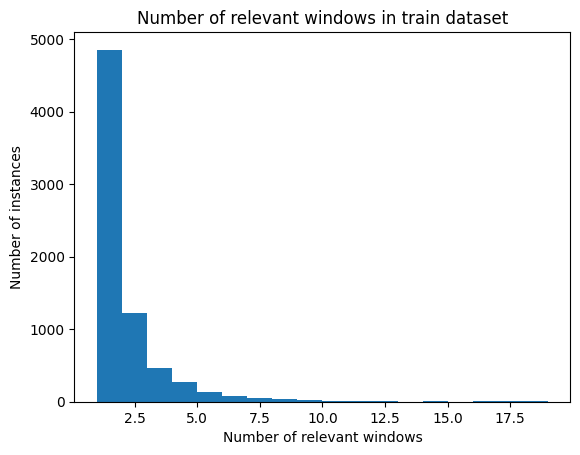

In [89]:
#plotting the number of relevant windows
num_relevant_windows = [instance['num_relevant_windows'] for instance in train_dataset]
plt.hist(num_relevant_windows, bins=range(1, 20))
plt.xlabel('Number of relevant windows')
plt.ylabel('Number of instances')  
plt.title('Number of relevant windows in train dataset')

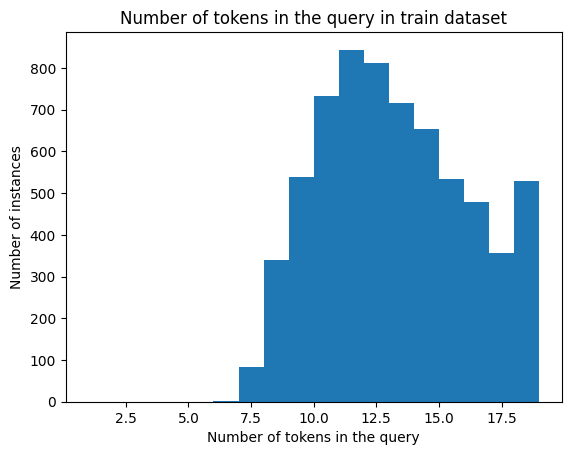

In [90]:
#plotting the number of tokens in the query
num_of_query_tokens = [instance['num_of_query_tokens'] for instance in train_dataset]
plt.hist(num_of_query_tokens, bins=range(1, 20))
plt.xlabel('Number of tokens in the query')
plt.ylabel('Number of instances')
plt.title('Number of tokens in the query in train dataset')
plt.show()

In [91]:
print('Length of the train dataset:', len(train_dataset))

Length of the train dataset: 7218


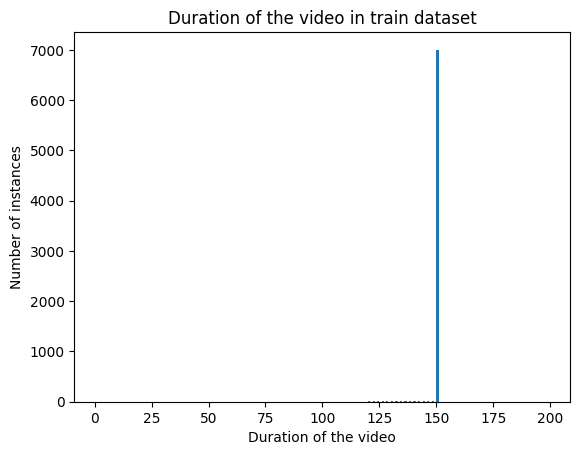

In [92]:
#plotting the duration of the videos
duration = [instance['duration'] for instance in train_dataset]
plt.hist(duration, bins=range(1, 200))
plt.xlabel('Duration of the video')
plt.ylabel('Number of instances')
plt.title('Duration of the video in train dataset')
plt.show()

In [93]:
#unique video durations in the train dataset
unique_durations = set(duration)
print('Unique video durations in the train dataset:', unique_durations)

Unique video durations in the train dataset: {128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 120, 122, 124, 126}


In [95]:
#remove those instances where the duration of the video is other than 150 seconds but do not allocate extra variable so that the memory is not wasted
train_dataset = [instance for instance in train_dataset if instance['duration'] == 150]
print('Length of the train dataset after removing the instances where the duration of the video is other than 150 seconds:', len(train_dataset))


Length of the train dataset after removing the instances where the duration of the video is other than 150 seconds: 7005


In [96]:
#how much memory has train_dataset occupied
memory = 0
for instance in train_dataset:
    memory += instance['query_embeddings'].nbytes
    memory += instance['query_pooler_output'].nbytes
    memory += instance['clip_features'].nbytes
    memory += instance['pann_features'].nbytes
    memory += instance['slowfast_features'].nbytes
print('Memory occupied by the train dataset in bytes:', memory)
print('Memory occupied by the train dataset in GB:', memory / (1024 * 1024 * 1024))

Memory occupied by the train dataset in bytes: 7373215232
Memory occupied by the train dataset in GB: 6.866841793060303


In [97]:
print('Shape of the query embeddings: ', train_dataset[0]['query_embeddings'].shape)
print('Shape of the query pooler output: ', train_dataset[0]['query_pooler_output'].shape)
print('Shape of the clip features: ', train_dataset[0]['clip_features'].shape)
print('Shape of the pann features: ', train_dataset[0]['pann_features'].shape)
print('Shape of the slowfast features: ', train_dataset[0]['slowfast_features'].shape)

Shape of the query embeddings:  (14, 512)
Shape of the query pooler output:  (512,)
Shape of the clip features:  (75, 512)
Shape of the pann features:  (75, 2048)
Shape of the slowfast features:  (76, 2304)
